# News Classification

In [42]:
import zipfile
import os
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.decomposition import TruncatedSVD
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, classification_report

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/grantbitner/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/grantbitner/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [43]:
with zipfile.ZipFile('learn-ai-bbc.zip', 'r') as zip_ref:
    zip_ref.extractall('learn-ai-bbc')

print(os.listdir('learn-ai-bbc'))
train_path = 'learn-ai-bbc/BBC News Train.csv'
test_path = 'learn-ai-bbc/BBC News Test.csv'
solution_path = 'learn-ai-bbc/BBC News Sample Solution.csv'

df_train = pd.read_csv(train_path)
df_test = pd.read_csv(test_path)
df_solution = pd.read_csv(solution_path)

print(df_train.head())

['BBC News Train.csv', 'BBC News Test.csv', 'BBC News Sample Solution.csv']
   ArticleId                                               Text  Category
0       1833  worldcom ex-boss launches defence lawyers defe...  business
1        154  german business confidence slides german busin...  business
2       1101  bbc poll indicates economic gloom citizens in ...  business
3       1976  lifestyle  governs mobile choice  faster  bett...      tech
4        917  enron bosses in $168m payout eighteen former e...  business


### Data Cleaning

In [44]:
print(df_train.isnull().sum())
print(df_test.isnull().sum())


ArticleId    0
Text         0
Category     0
dtype: int64
ArticleId    0
Text         0
dtype: int64


### Distribution

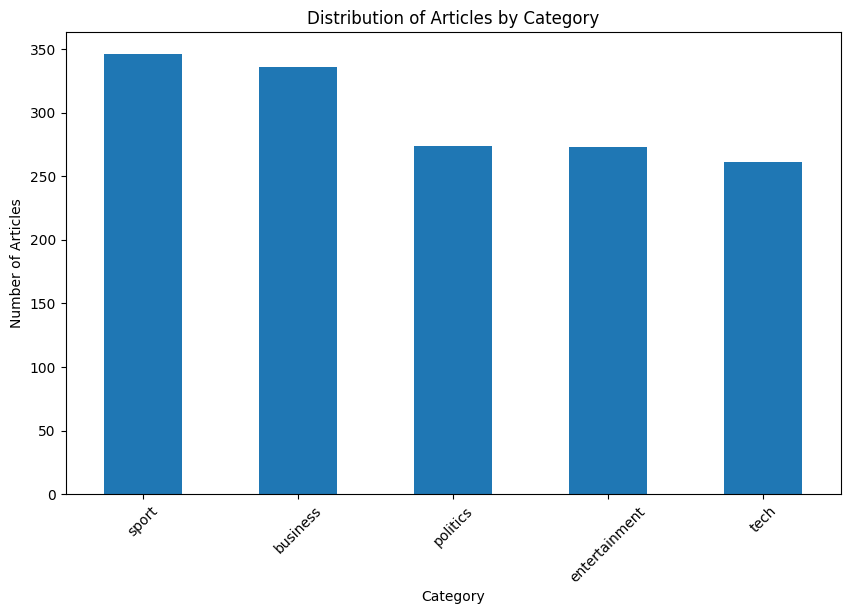

In [45]:
category_counts = df_train['Category'].value_counts()

plt.figure(figsize=(10, 6))
category_counts.plot(kind='bar')
plt.title('Distribution of Articles by Category')
plt.xlabel('Category')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45)
plt.show()


### Analysis of common words

In [46]:
df_train['tokens'] = df_train['Text'].apply(lambda x: [word.lower() for word in word_tokenize(x) if word.isalpha()])
stop_words = set(stopwords.words('english'))
df_train['filtered_tokens'] = df_train['tokens'].apply(lambda x: [word for word in x if word not in stop_words])

# Calculating average article length
average_length = df_train['filtered_tokens'].apply(len).mean()
print(f"Average article length in words: {average_length}")

# Most common words
all_words = [word for tokens_list in df_train['filtered_tokens'] for word in tokens_list]
word_counts = Counter(all_words)
print("Most common words:", word_counts.most_common(10))

Average article length in words: 208.23020134228187
Most common words: [('said', 4838), ('mr', 1970), ('would', 1711), ('also', 1426), ('new', 1334), ('people', 1323), ('us', 1234), ('year', 1209), ('one', 1158), ('could', 1032)]


### Model Training

In [47]:
# Download stopwords and tokenizer
nltk.download('stopwords')
nltk.download('punkt')

# Tokenization and removal of stopwords
stop_words = set(stopwords.words('english'))
df_train['tokens'] = df_train['Text'].apply(lambda x: [word.lower() for word in word_tokenize(x) if word.isalpha()])
df_train['filtered_tokens'] = df_train['tokens'].apply(lambda x: [word for word in x if word not in stop_words])

# Combine the filtered tokens back into strings
df_train['filtered_text'] = df_train['filtered_tokens'].apply(lambda x: ' '.join(x))

# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X = tfidf_vectorizer.fit_transform(df_train['filtered_text'])
y = df_train['Category']

# Split the data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

print("Data has been vectorized and split into training and validation sets.")
print(f"Training set shape: {X_train.shape}")
print(f"Validation set shape: {X_val.shape}")



[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/grantbitner/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/grantbitner/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Data has been vectorized and split into training and validation sets.
Training set shape: (1192, 5000)
Validation set shape: (298, 5000)


### Supervised

In [48]:
# Logistic Regression Model
logistic_regression = LogisticRegression(max_iter=1000)

# Fit the model
logistic_regression.fit(X_train, y_train)

# Predictions
y_pred_lr = logistic_regression.predict(X_val)

# Evaluation
accuracy_lr = accuracy_score(y_val, y_pred_lr)
report_lr = classification_report(y_val, y_pred_lr)

print(f"Logistic Regression Model Accuracy: {accuracy_lr}")
print("Classification Report for Logistic Regression Model:")
print(report_lr)


Logistic Regression Model Accuracy: 0.9664429530201343
Classification Report for Logistic Regression Model:
               precision    recall  f1-score   support

     business       0.94      0.97      0.95        75
entertainment       0.98      0.98      0.98        46
     politics       0.96      0.95      0.95        56
        sport       0.98      1.00      0.99        63
         tech       0.98      0.93      0.96        58

     accuracy                           0.97       298
    macro avg       0.97      0.97      0.97       298
 weighted avg       0.97      0.97      0.97       298



### Unsupervised

In [49]:
# SVD Model
svd = TruncatedSVD(n_components=100)
logistic_regression = LogisticRegression(max_iter=1000)

# Create a pipeline
svd_pipeline = make_pipeline(svd, logistic_regression)

# Fit the model
svd_pipeline.fit(X_train, y_train)

# Predictions
y_pred_svd = svd_pipeline.predict(X_val)

# Evaluation
accuracy_svd = accuracy_score(y_val, y_pred_svd)
report_svd = classification_report(y_val, y_pred_svd)

print(f"SVD Model Accuracy: {accuracy_svd}")
print("Classification Report for SVD Model:")
print(report_svd)


SVD Model Accuracy: 0.9664429530201343
Classification Report for SVD Model:
               precision    recall  f1-score   support

     business       0.94      0.97      0.95        75
entertainment       1.00      0.98      0.99        46
     politics       0.96      0.95      0.95        56
        sport       0.97      1.00      0.98        63
         tech       0.98      0.93      0.96        58

     accuracy                           0.97       298
    macro avg       0.97      0.97      0.97       298
 weighted avg       0.97      0.97      0.97       298



### Summary

Both the Logistic Regression model and the SVD model demonstrated high accuracy in classifying BBC news articles, with the Logistic Regression model slightly outperforming the SVD model (96.6% vs. 96.0% accuracy). Both models showed balanced precision, recall, and f1-scores across all categories. The Logistic Regression model's marginally better performance suggests that TF-IDF vectorization effectively captured the essential features of the text data. Future work could explore more advanced NLP models like LSTM or BERT and fine-tuning hyperparameters to enhance performance further. Overall, both models provided robust and reliable classifications for the news articles.